# Adaptive learning rate


In this analysis we will compare the use cases of adaptive learning rate and fixed learning rate. We will see if there is a significant difference between the cases t1 and t2, and for the cases t1 and t1_d. These images will be evaluated using the correlation metric and the images all can undergo affined transformations. 

First, the cases of t1 and t1_d images will be computed with a fixed learning rate. 
second, the cases of t1 and t2 images will be computed with a fixed learning rate. 
third, the cases of t1 and t1_d images will be computed with a adaptive learning rate. 
lastly, the cases of t1 and t2 images will be computed with a adaptive learning rate. 

then, once all outputs have been computed, of the resulting similarity arrays the last element will be taken, the 'optimal' similarity..
These last values will be compared between the corresponding cases (fixed t1 and t1_d with its adaptive form, just like t1 and t2) and subsequently seen if there is a significant difference between them

In [4]:
from os import listdir
import sys
import numpy as np
import os
%matplotlib inline
import sys
sys.path.append("../code")
import registration

from registration_project import intensity_based_registration
import matplotlib.pyplot as plt 
import registration_util as util


In [5]:
images = listdir('../data/image_data')

t1 = []
t2= []
t1_d = []

path = '../data/image_data/'
for image in images:
    
    if 't1_d' in os.path.basename(image):
        t1_d.append(path+image)
    elif   't1' in os.path.basename(image):
        t1.append(path+image)
    else:
        t2.append(path+image)


t1 = t1[:4]
t1_d = t1_d[:4]
t2 = t2[:4]
    
print(t1)
print(t1_d)
print(t2)

print(len(t1))
print(len(t1_d))
print(len(t2))

['../data/image_data/1_1_t1.tif', '../data/image_data/1_2_t1.tif', '../data/image_data/1_3_t1.tif', '../data/image_data/2_1_t1.tif']
['../data/image_data/1_1_t1_d.tif', '../data/image_data/1_2_t1_d.tif', '../data/image_data/1_3_t1_d.tif', '../data/image_data/2_1_t1_d.tif']
['../data/image_data/1_1_t2.tif', '../data/image_data/1_2_t2.tif', '../data/image_data/1_3_t2.tif', '../data/image_data/2_1_t2.tif']
4
4
4


## Point based registration

### vlindertjes: punten waarbij je de binnenste structuren van het brein aan moet geven

In [6]:

points_t1_t1_d = []
for image_t1, image_t1_d in zip(t1, t1_d):
        
    X_t1_t1, Xm_t1_t1 = util.cpselect(image_t1, image_t1_d)

    print('X:\n{}'.format(X_t1_t1))
    print('Xm:\n{}'.format(Xm_t1_t1))
    
    points_t1_t1_d.append([X_t1_t1,Xm_t1_t1, image_t1, image_t1_d])

points_t1_t2 = []
for image_t1, image_t2 in zip(t1, t2):

    X_t1_t2, Xm_t1_t2 = util.cpselect(image_t1, image_t2)

    print('X:\n{}'.format(X_t1_t2))
    print('Xm:\n{}'.format(Xm_t1_t2))
    
    points_t1_t2.append([X_t1_t2, Xm_t1_t2, image_t1, image_t2])


print(points_t1_t1_d[0])
print(points_t1_t2[0])

X:
[[124.68709677 157.9        125.96451613 156.62258065]
 [104.66645161 105.94387097 168.53741935 168.53741935]]
Xm:
[[125.26774194 163.59032258 126.54516129 158.48064516]
 [107.22129032 103.38903226 163.42774194 168.53741935]]
X:
[[125.96451613 161.73225806 118.3        171.9516129 ]
 [114.88580645 112.33096774 168.53741935 191.53096774]]
Xm:
[[126.54516129 166.14516129 120.15806452 176.36451613]
 [121.27290323 116.16322581 181.3116129  206.86      ]]
X:
[[125.96451613 157.9        119.57741935 159.17741935]
 [113.6083871  109.77612903 200.47290323 194.08580645]]
Xm:
[[140.59677419 171.25483871 140.59677419 181.47419355]
 [113.6083871  112.33096774 195.36322581 197.91806452]]
X:
[[127.24193548 152.79032258 119.57741935 164.28709677]
 [104.66645161 102.1116129  154.48580645 155.76322581]]
Xm:
[[139.31935484 168.7        132.93225806 177.64193548]
 [114.88580645 113.6083871  168.53741935 168.53741935]]
X:
[[128.51935484 160.45483871 125.96451613 160.45483871]
 [108.49870968 103.3890322

[[0.90488837 0.03039068 7.34602851]]


[[ 9.38387901e-01 -4.00053017e-03  6.88522257e+00]]
[[ 0.99738619 -0.09172743 -3.21168981]]
[[ 0.9608073   0.01326413 -9.48855196]]
[[ 0.90476858 -0.02314213 22.41665318]]
[[ 0.95957368  0.03883604 -3.01218651]]
[[ 0.95376096 -0.05600134  4.89516715]]
[[ 0.91467169 -0.03960214 15.58840313]]


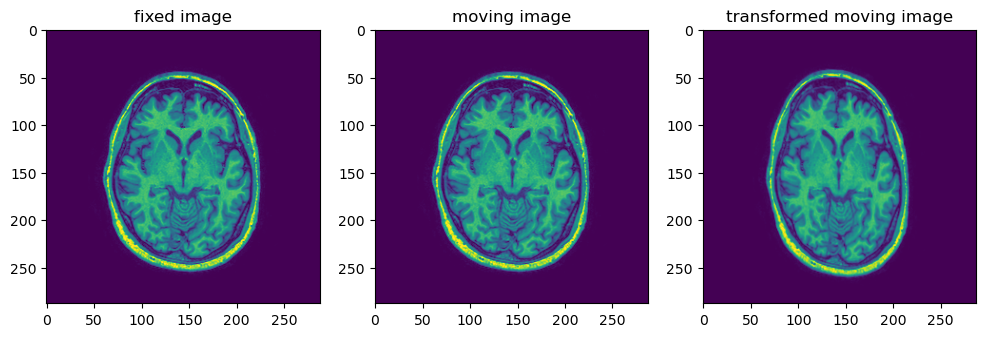

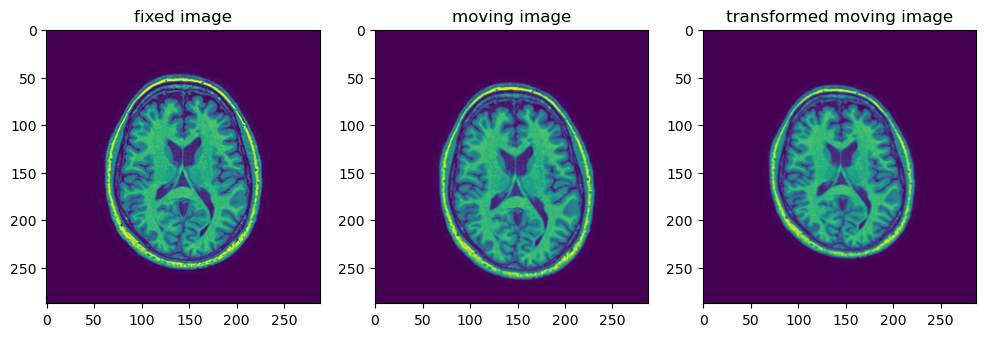

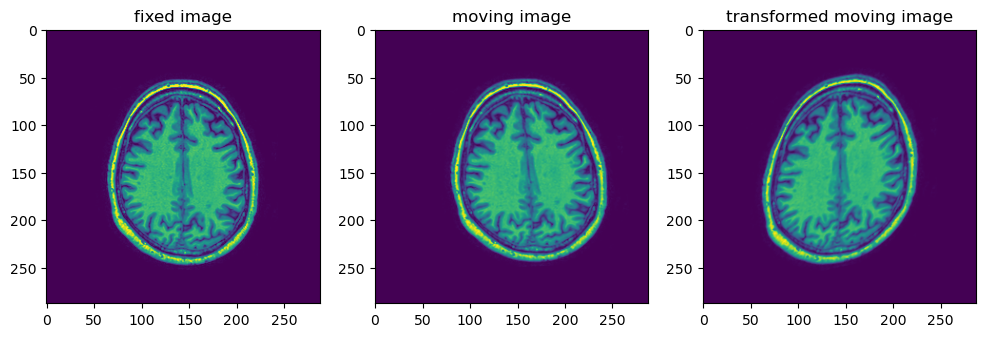

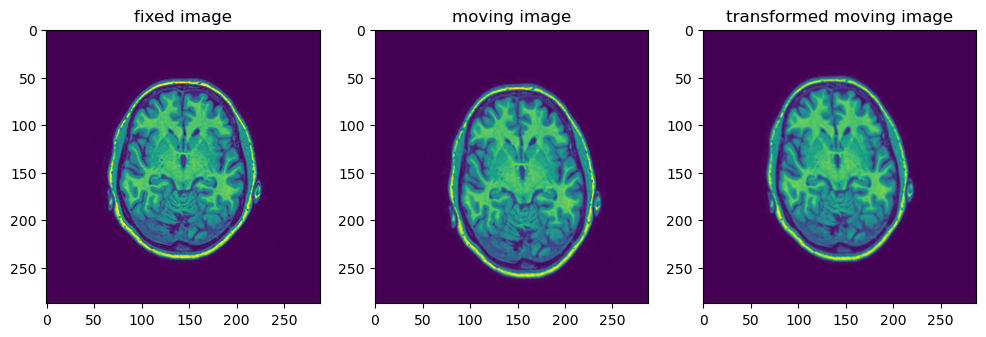

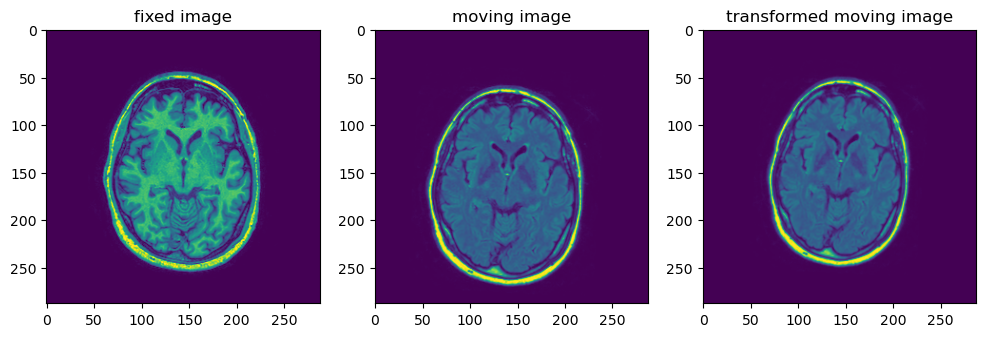

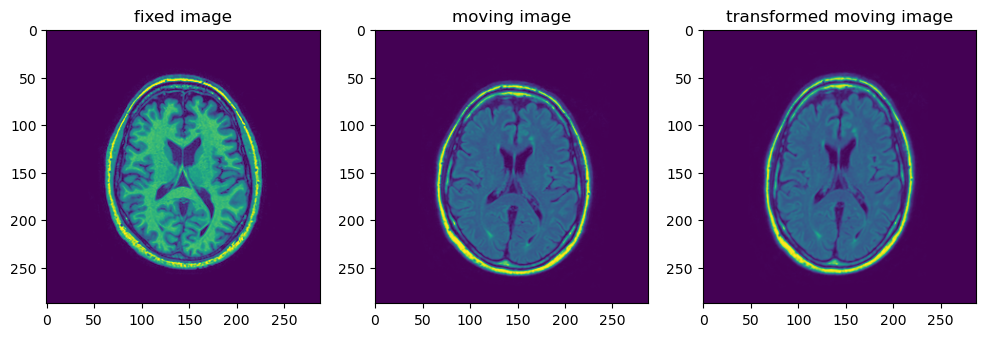

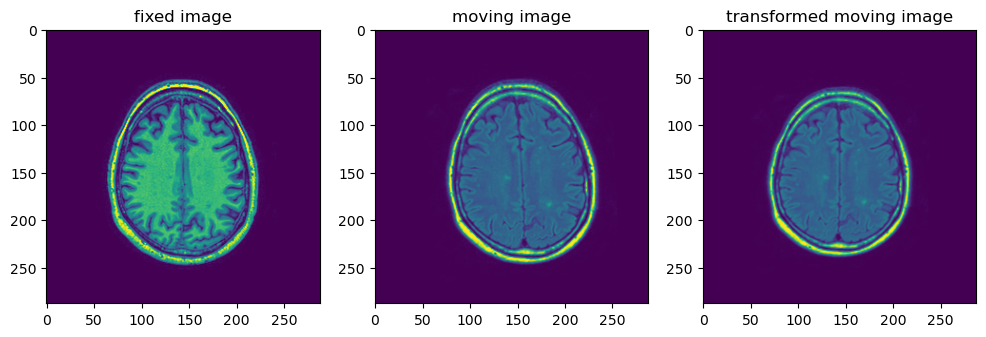

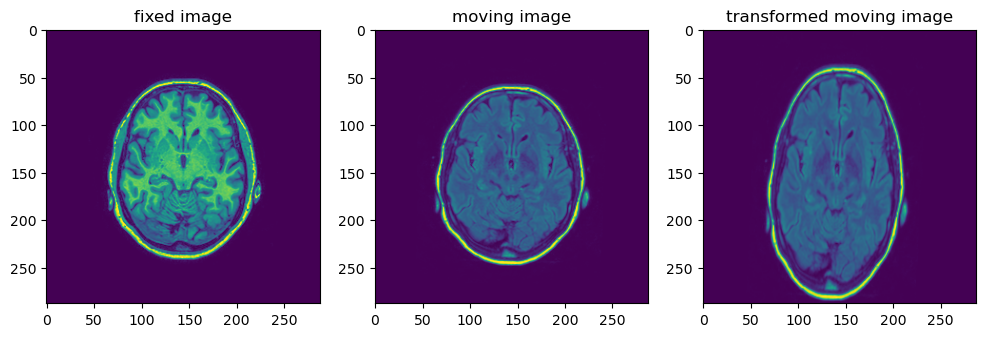

In [7]:
transformed_images_t1 = []
transformation_matrices_t1 = []
fixed_images_t1 = []
for transformations in points_t1_t1_d:
    
    Xh = util.c2h(transformations[0])
    Xhm = util.c2h(transformations[1])

    
    T_t1_t1 = registration.ls_affine(Xh, Xhm)
    

    Im = plt.imread(transformations[3])
    I = plt.imread(transformations[2])

    it_1 , xt_1= registration.image_transform(Im, T_t1_t1)

    fig = plt.figure(figsize=(12,5))

    ax1 = fig.add_subplot(131)
    im11 = ax1.imshow(I)
    ax1.set_title('fixed image')

    ax2 = fig.add_subplot(132)
    im21 = ax2.imshow(Im)
    ax2.set_title('moving image')

    ax3 = fig.add_subplot(133)
    im31 = ax3.imshow(it_1)
    ax3.set_title('transformed moving image')
    
    transformation_matrices_t1.append(T_t1_t1)
    transformed_images_t1.append(it_1)
    fixed_images_t1.append(I)


transformed_images_t2 = []
transformation_matrices_t2 = []
fixed_images_t2= []
for transformations in points_t1_t2:
    
    Xh = util.c2h(transformations[0])
    Xhm = util.c2h(transformations[1])

    
    T_t1_t2 = registration.ls_affine(Xh, Xhm)
    

    Im = plt.imread(transformations[3])
    I = plt.imread(transformations[2])

    it_1 , xt_1= registration.image_transform(Im, T_t1_t2)

    fig = plt.figure(figsize=(12,5))

    ax1 = fig.add_subplot(131)
    im11 = ax1.imshow(I)
    ax1.set_title('fixed image')

    ax2 = fig.add_subplot(132)
    im21 = ax2.imshow(Im)
    ax2.set_title('moving image')

    ax3 = fig.add_subplot(133)
    im31 = ax3.imshow(it_1)
    ax3.set_title('transformed moving image')

    transformation_matrices_t2.append(T_t1_t2)
    transformed_images_t1.append(it_1)
    fixed_images_t2.append(I)





### buitsenste hersen structuren: selecteren van buitsenste structuren om TRE te checken

In [8]:

points_t1_t1_d_outer = []
for image_t1, image_t1_d in zip(t1, t1_d):
        
    X_t1_t1, Xm_t1_t1 = util.cpselect(image_t1, image_t1_d)

    print('X:\n{}'.format(X_t1_t1))
    print('Xm:\n{}'.format(Xm_t1_t1))
    
    points_t1_t1_d_outer.append([X_t1_t1,Xm_t1_t1, image_t1, image_t1_d])

points_t1_t2_outer = []
for image_t1, image_t2 in zip(t1, t2):

    X_t1_t2, Xm_t1_t2 = util.cpselect(image_t1, image_t2)

    print('X:\n{}'.format(X_t1_t2))
    print('Xm:\n{}'.format(Xm_t1_t2))
    
    points_t1_t2_outer.append([X_t1_t2,Xm_t1_t2, image_t1, image_t2])


print(points_t1_t1_d_outer[0])
print(points_t1_t2_outer[0])

X:
[[145.12580645 221.77096774 134.90645161  63.37096774]
 [ 48.46       145.54387097 241.35032258 135.32451613]]
Xm:
[[141.87419355 221.07419355 149.53870968  67.78387097]
 [ 56.12451613 155.76322581 245.18258065 128.93741935]]
X:
[[145.12580645 215.38387097 141.29354839  68.48064516]
 [ 49.73741935 157.04064516 246.46       146.82129032]]
Xm:
[[144.42903226 226.18387097 155.92580645  67.78387097]
 [ 70.17612903 158.31806452 256.67935484 162.15032258]]
X:
[[138.73870968 220.49354839 143.8483871   63.37096774]
 [ 53.56967742 153.2083871  243.90516129 146.82129032]]
Xm:
[[161.03548387 231.29354839 173.80967742  78.00322581]
 [ 56.12451613 148.09870968 238.79548387 160.87290323]]
X:
[[141.29354839 217.93870968 148.95806452  73.59032258]
 [ 53.56967742 150.65354839 240.07290323 145.54387097]]
Xm:
[[153.37096774 230.01612903 161.03548387  84.39032258]
 [ 56.12451613 162.15032258 259.23419355 155.76322581]]
X:
[[143.8483871  217.93870968 141.29354839  64.6483871 ]
 [ 48.46       163.4277419

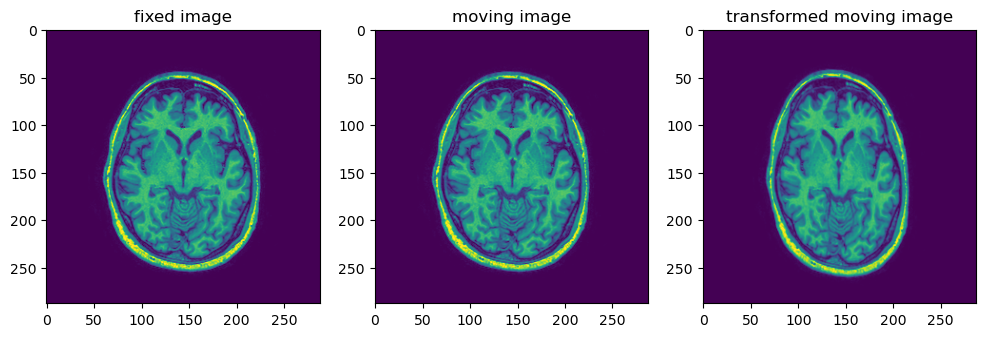

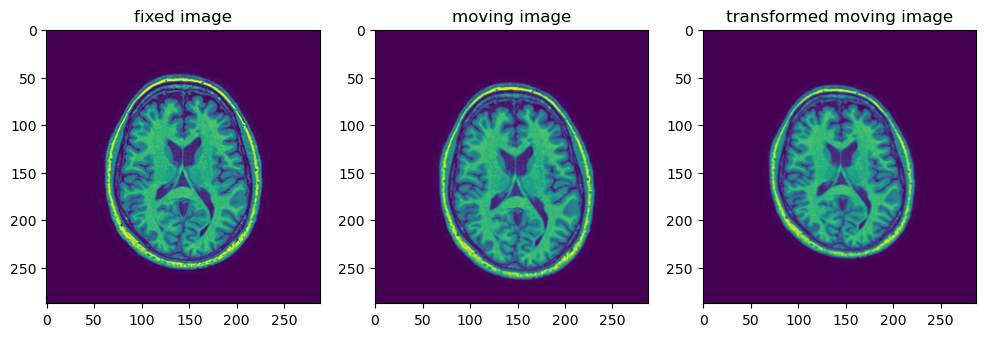

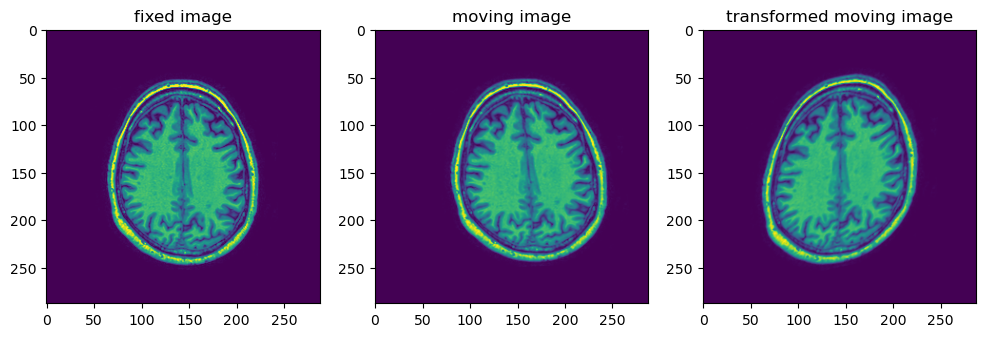

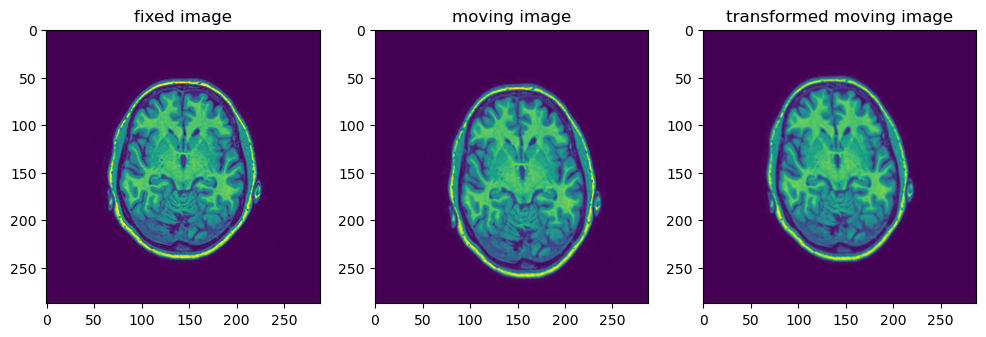

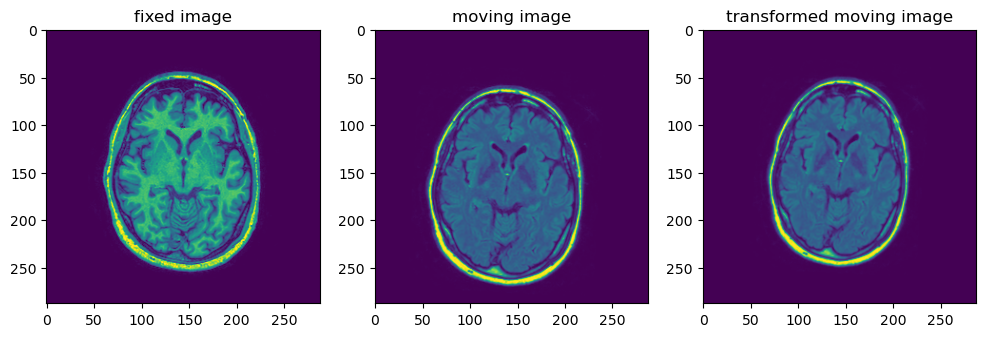

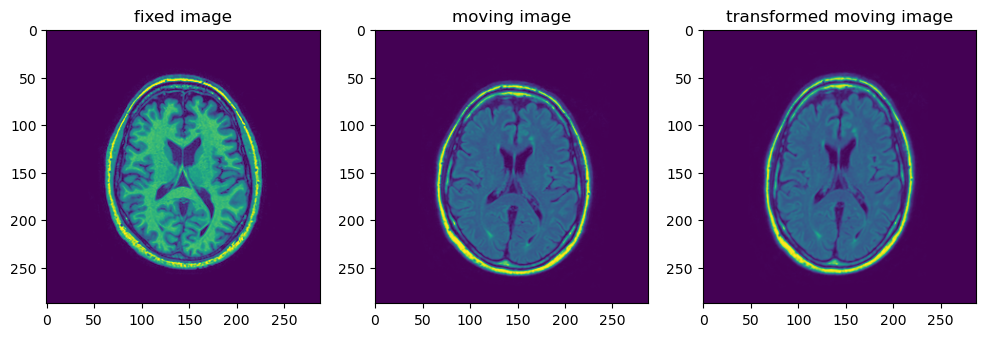

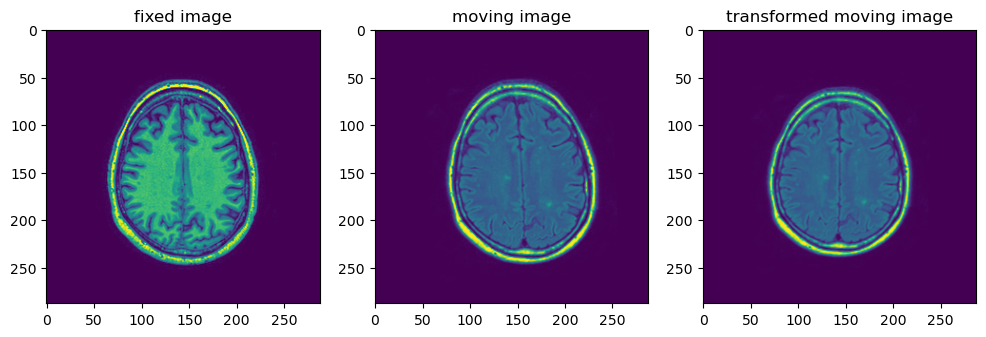

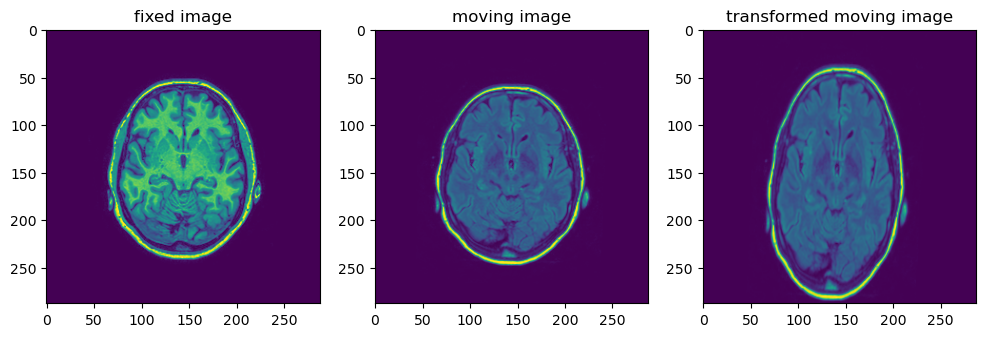

In [9]:
transformed_images_outer_t1 = []
for transformations, transformation_matrix in zip(points_t1_t1_d_outer, transformation_matrices_t1):
    
    Xh = util.c2h(transformations[0])
    Xhm = util.c2h(transformations[1])

    
    T_t1_t1 = transformation_matrix
    

    Im = plt.imread(transformations[3])
    I = plt.imread(transformations[2])

    it_1 , xt_1= registration.image_transform(Im, T_t1_t1)

    fig = plt.figure(figsize=(12,5))

    ax1 = fig.add_subplot(131)
    im11 = ax1.imshow(I)
    ax1.set_title('fixed image')

    ax2 = fig.add_subplot(132)
    im21 = ax2.imshow(Im)
    ax2.set_title('moving image')

    ax3 = fig.add_subplot(133)
    im31 = ax3.imshow(it_1)
    ax3.set_title('transformed moving image')
    
    transformation_matrices_t1.append(T_t1_t1)
    transformed_images_outer_t1.append(it_1)
    

transformed_images_outer_t2 = []
for transformations, transformation_matrix in zip(points_t1_t2_outer, transformation_matrices_t2):
    
    Xh = util.c2h(transformations[0])
    Xhm = util.c2h(transformations[1])

    
    T_t1_t2 = transformation_matrix
    

    Im = plt.imread(transformations[3])
    I = plt.imread(transformations[2])

    it_1 , xt_1= registration.image_transform(Im, T_t1_t2)

    fig = plt.figure(figsize=(12,5))

    ax1 = fig.add_subplot(131)
    im11 = ax1.imshow(I)
    ax1.set_title('fixed image')

    ax2 = fig.add_subplot(132)
    im21 = ax2.imshow(Im)
    ax2.set_title('moving image')

    ax3 = fig.add_subplot(133)
    im31 = ax3.imshow(it_1)
    ax3.set_title('transformed moving image')

    transformation_matrices_t2.append(T_t1_t2)
    transformed_images_outer_t2.append(it_1)





In [10]:

TRE_t1 = []
validation_points_outer_t1 = [outer[1] for outer in points_t1_t1_d_outer ]
for points_outer, transformed_image_outer, fixed_image in zip(validation_points_outer_t1, transformed_images_outer_t1, fixed_images_t1):
    
    for i in range(len(points_outer)):
        x = points_outer[0][i]
        y = points_outer[1][i]
        
        TRE = transformed_image_outer[int(x)][int(y)] - fixed_image[int(x)][int(y)]
        
        
    TRE_t1.append(TRE)


TRE_t2 = []
validation_points_outer_t2 = [outer[1] for outer in points_t1_t2_outer ]
for points_outer, transformed_image_outer, fixed_image in zip(validation_points_outer_t2, transformed_images_outer_t2, fixed_images_t2):
    
    for i in range(len(points_outer)):
        x = points_outer[0][i]
        y = points_outer[1][i]
        
        TRE = transformed_image_outer[int(x)][int(y)] - fixed_image[int(x)][int(y)]
        
        
    TRE_t2.append(TRE)
    
print(TRE_t1)
print(TRE_t2)



[54, 251, 89, 243]
[35, 172, 130, 38]


C:\Users\Aniek\AppData\Local\Temp\ipykernel_26396\1642841537.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  TRE = transformed_image_outer[int(x)][int(y)] - fixed_image[int(x)][int(y)]
C:\Users\Aniek\AppData\Local\Temp\ipykernel_26396\1642841537.py:23: RuntimeWarning: overflow encountered in ubyte_scalars
  TRE = transformed_image_outer[int(x)][int(y)] - fixed_image[int(x)][int(y)]


### Correlation fixed learning rate of  t1 t1_d images (affine)

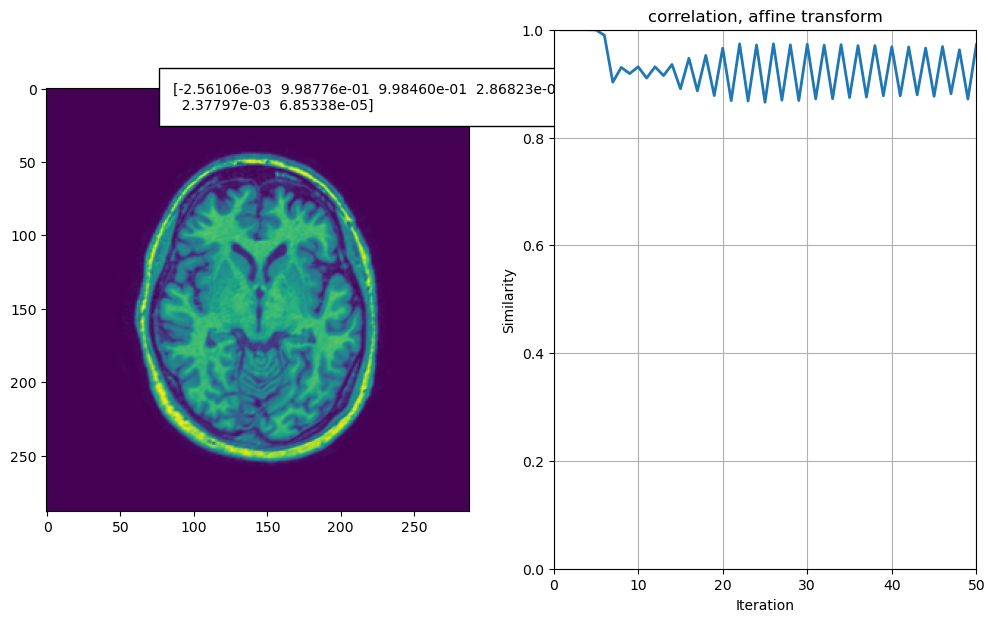

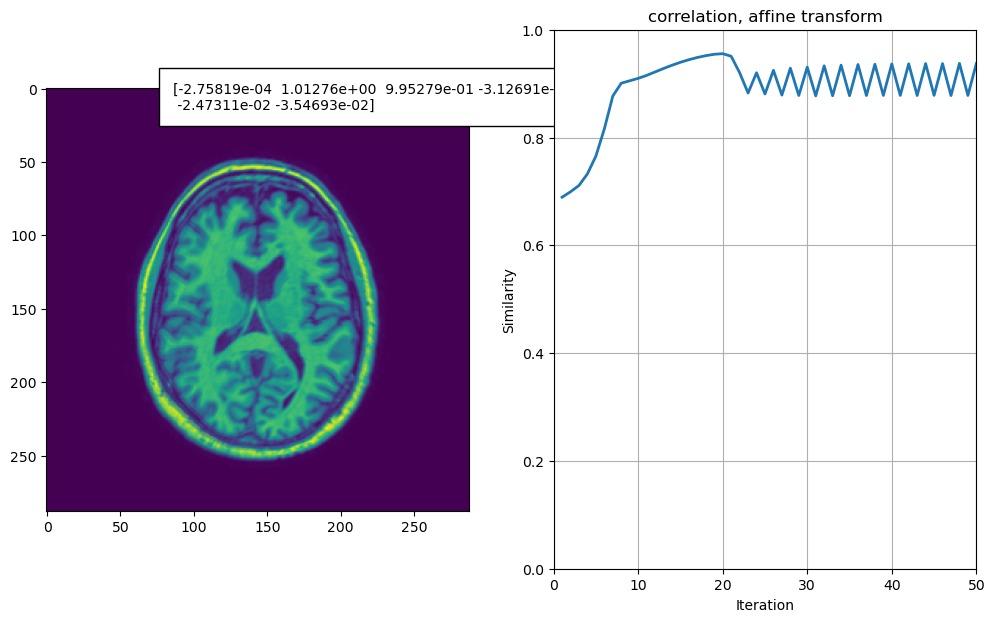

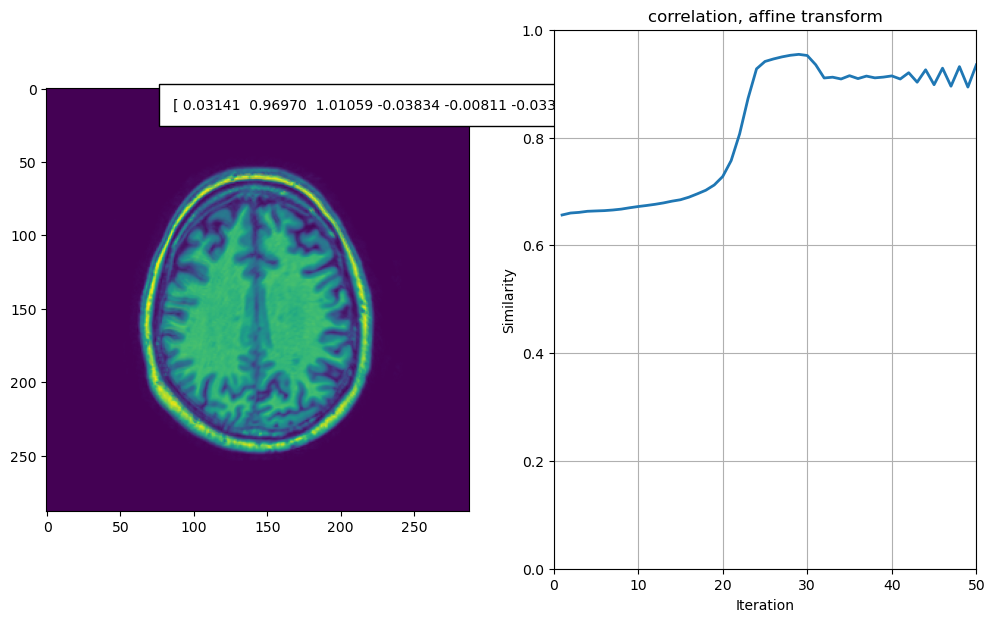

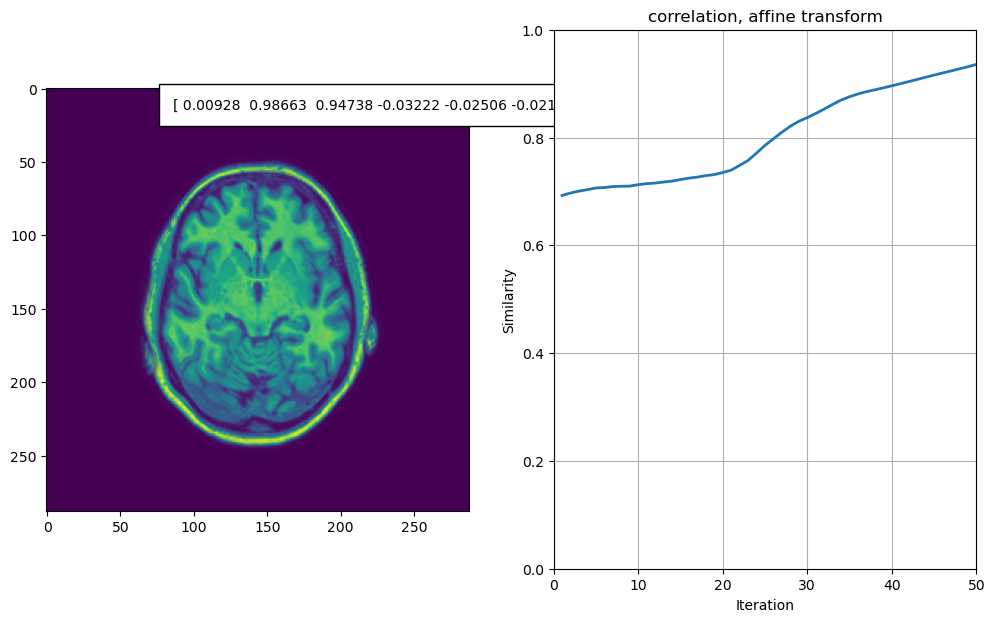

In [11]:
outputs_fixed_learning_rate_t1_t1_d = []
for image_t1, image_t1_d in zip(t1, t1_d):

    print('computing correlation for image:' + image_t1 + ' and ' + image_t1_d)
    I = plt.imread(image_t1)
    Im = plt.imread(image_t1_d)
    t1_t1_d_output_ncc = intensity_based_registration(I, Im, adaptive_learning = False, ncc = True, rigid = False)
    outputs_fixed_learning_rate_t1_t1_d.append(t1_t1_d_output_ncc)


In [18]:
TRE_t1_corr = []
for points_outer, image_output, fixed_image in zip(validation_points_outer_t1, outputs_fixed_learning_rate_t1_t1_d, fixed_images_t1):
    im2, S, Th = image_output

    img_array = im2.get_array()

    for i in range(len(points_outer)):
        x = points_outer[0][i]
        y = points_outer[1][i]
        
    TRE = img_array[int(x)][int(y)] - fixed_image[int(x)][int(y)]
        
    TRE_t1_corr.append(TRE)
            
print(TRE_t1_corr)

[6, 250, 35, 247]


C:\Users\Aniek\AppData\Local\Temp\ipykernel_26396\1313336606.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  TRE = img_array[int(x)][int(y)] - fixed_image[int(x)][int(y)]


### Correlation with fixed learning rate of t1 with t2 images (affine)

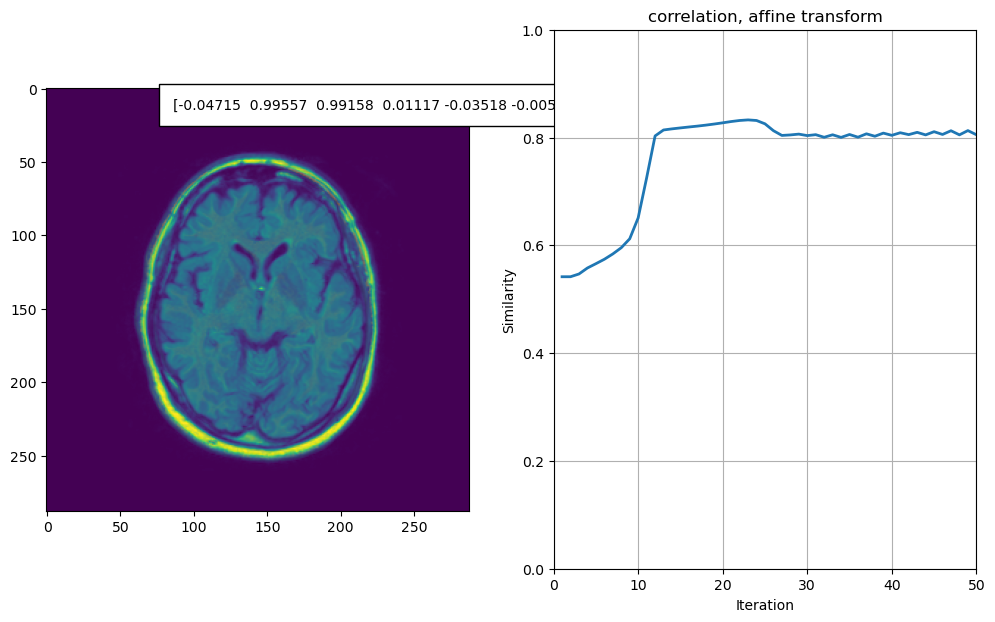

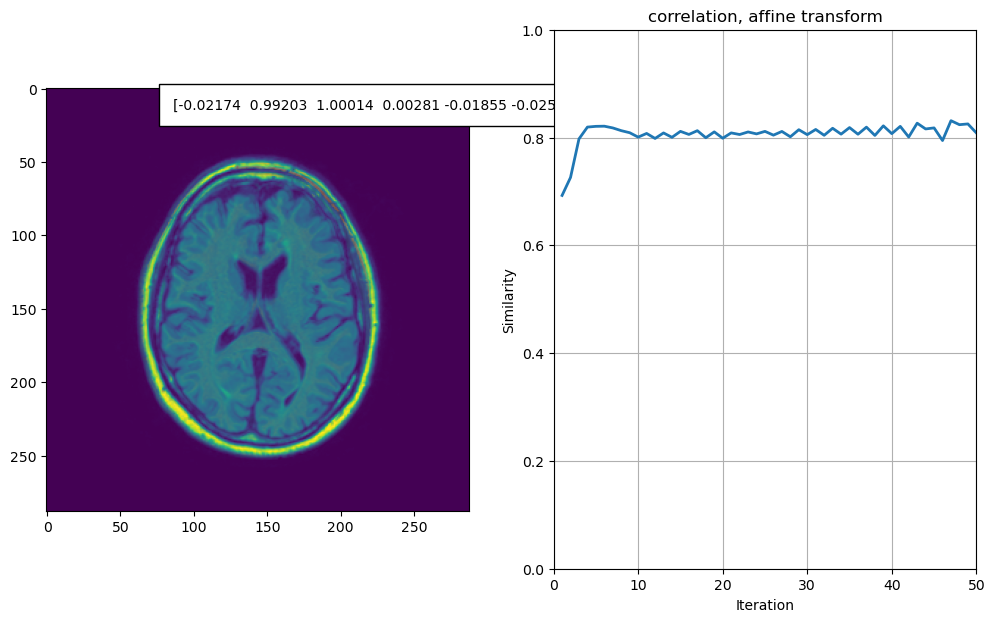

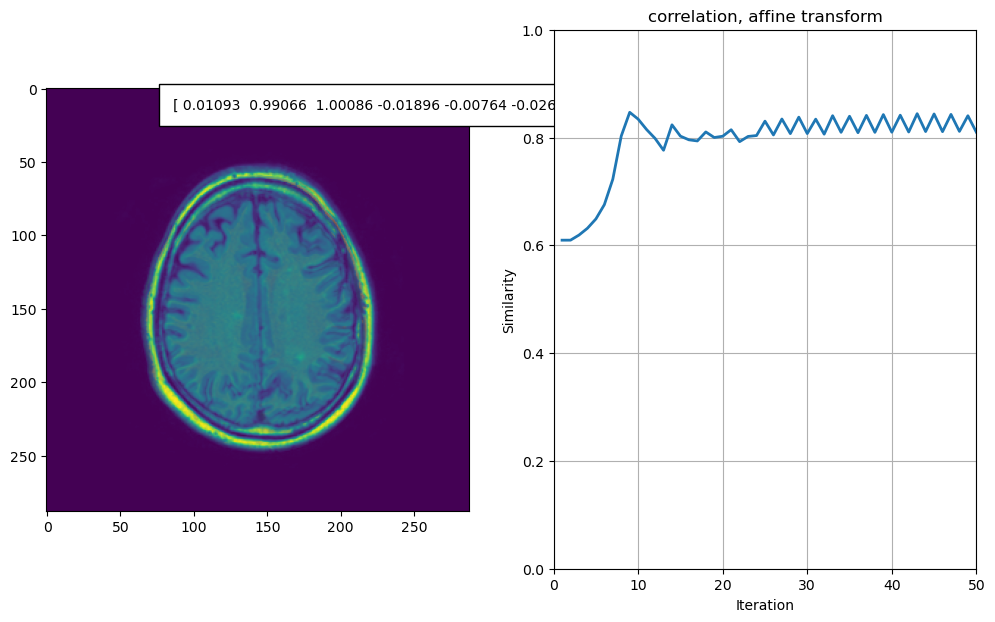

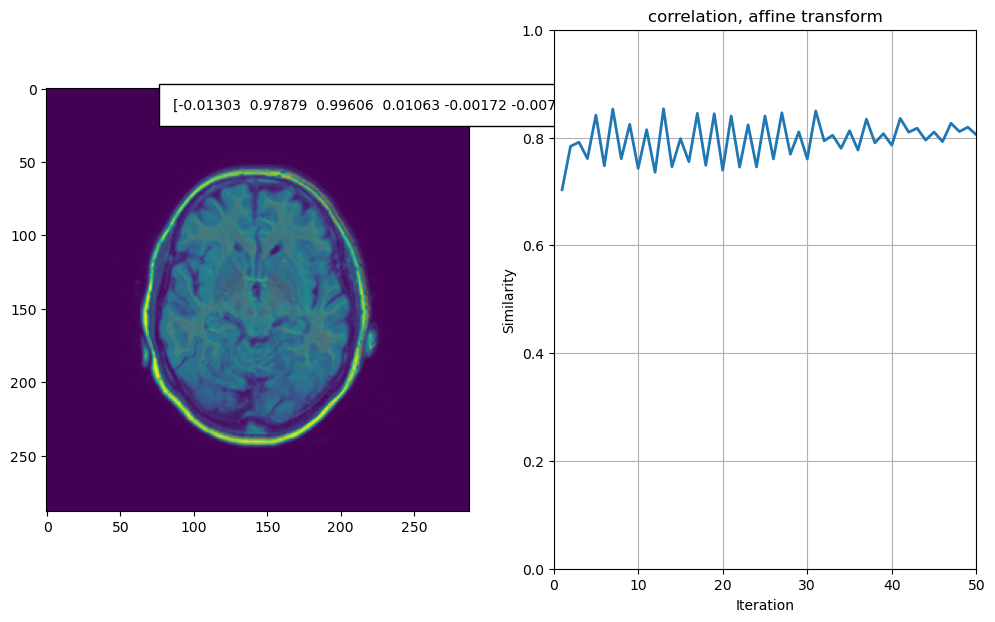

In [20]:
outputs_fixed_learning_rate_t1_t2 = []
for image_t1, image_t2 in zip(t1, t2):

    print('computing correlation for image:' + image_t1 + ' and ' + image_t2)
    I = plt.imread(image_t1)
    Im = plt.imread(image_t2)
    t1_t2_output_ncc = intensity_based_registration(I, Im, adaptive_learning = False, ncc = True, rigid = False)
    outputs_fixed_learning_rate_t1_t2.append(t1_t2_output_ncc)

In [21]:
TRE_t2_corr = []
for points_outer, image_output, fixed_image in zip(validation_points_outer_t2, outputs_fixed_learning_rate_t1_t2, fixed_images_t2):
    im2, S, Th = image_output

    img_array = im2.get_array()

    for i in range(len(points_outer)):
        x = points_outer[0][i]
        y = points_outer[1][i]
        
    TRE = img_array[int(x)][int(y)] - fixed_image[int(x)][int(y)]
        
    TRE_t2_corr.append(TRE)
            
print(TRE_t2_corr)

[26, 171, 94, 240]


C:\Users\Aniek\AppData\Local\Temp\ipykernel_26396\405700112.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  TRE = img_array[int(x)][int(y)] - fixed_image[int(x)][int(y)]


### Correlation with adaptive learning rate of t1 and t1_d images (affine)

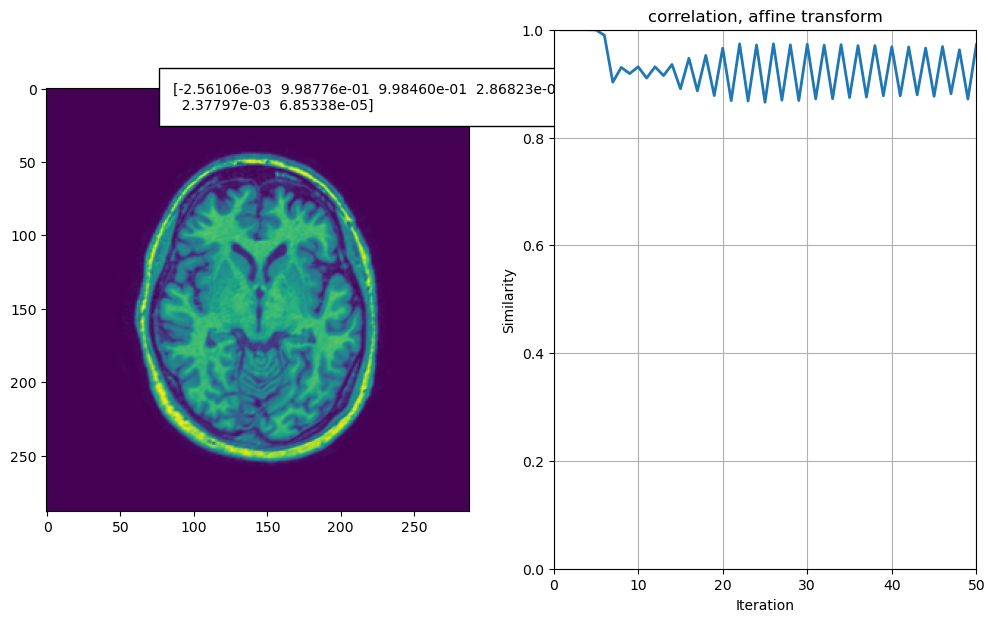

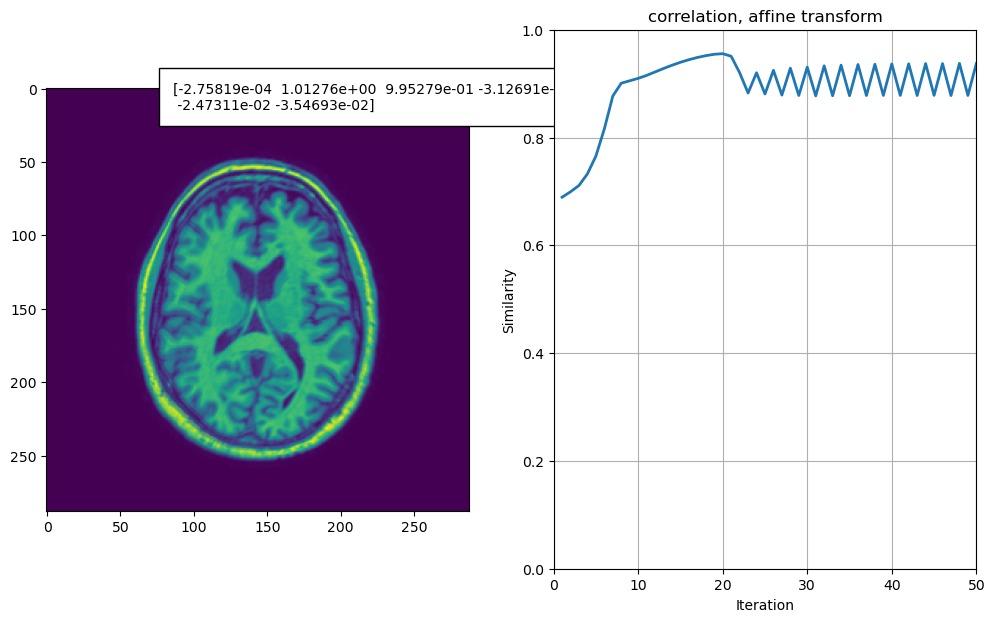

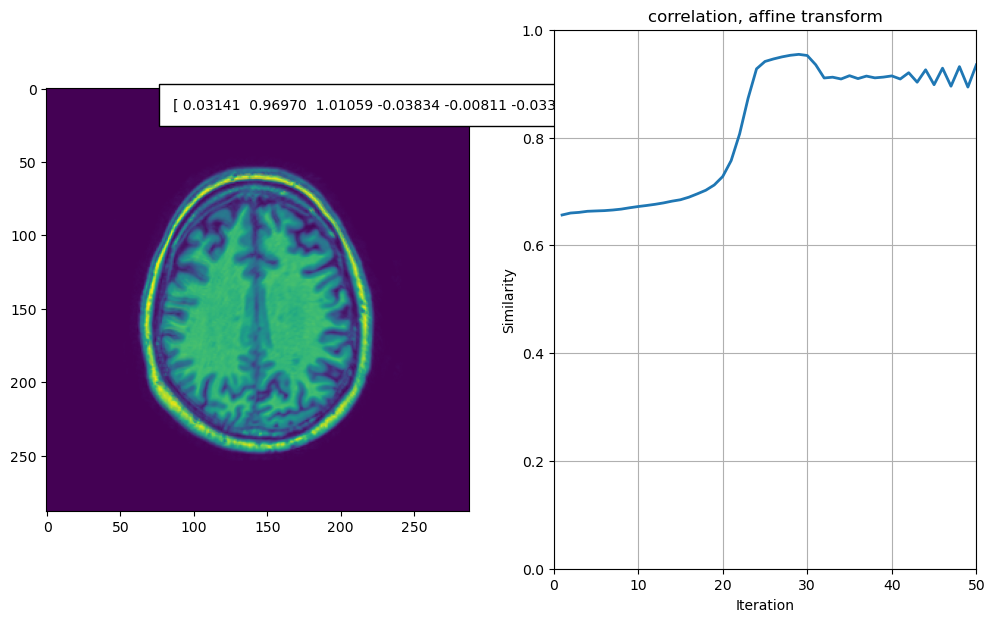

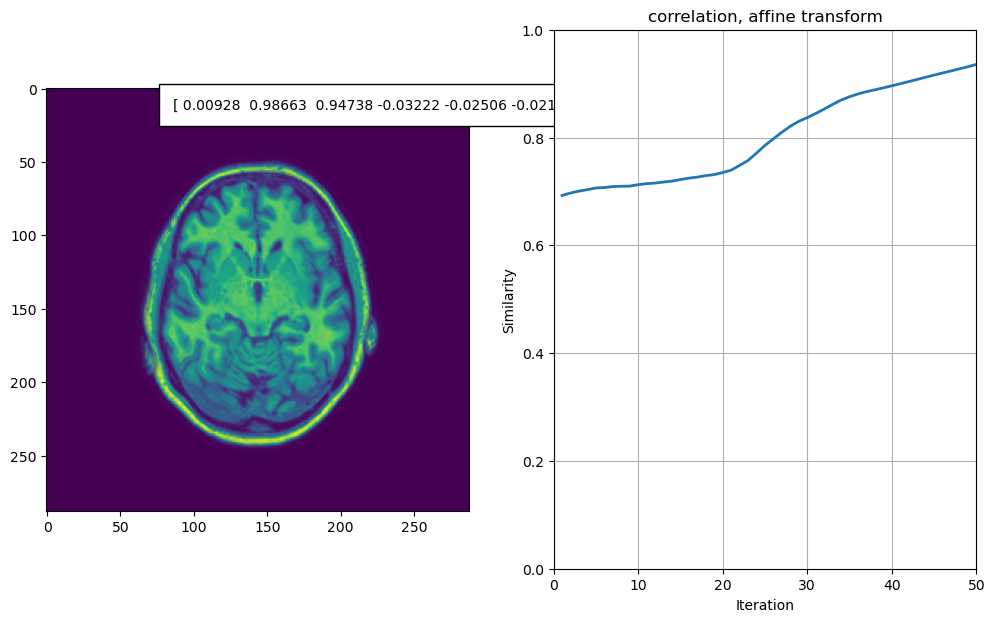

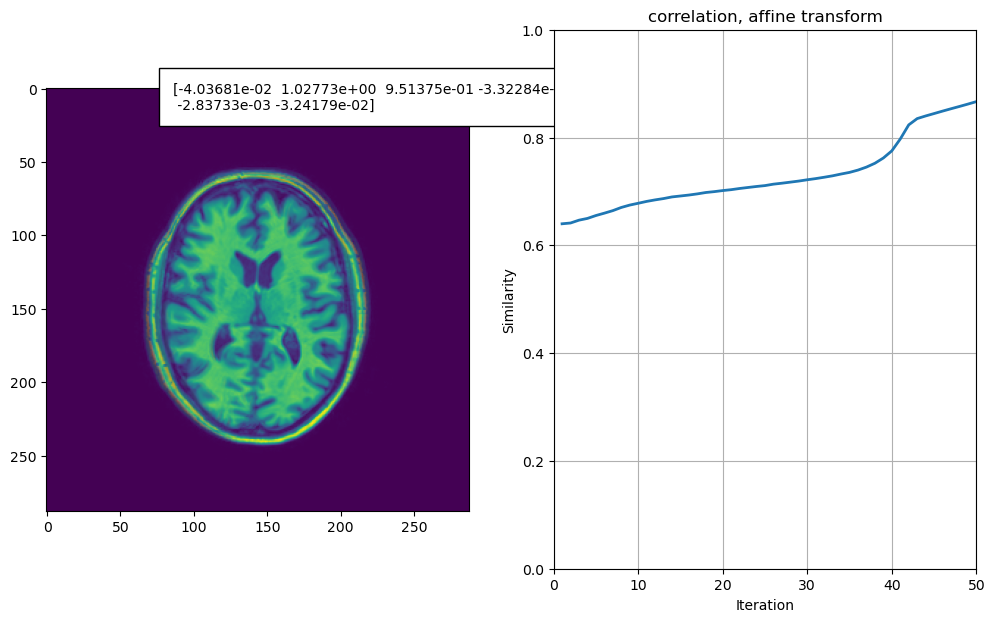

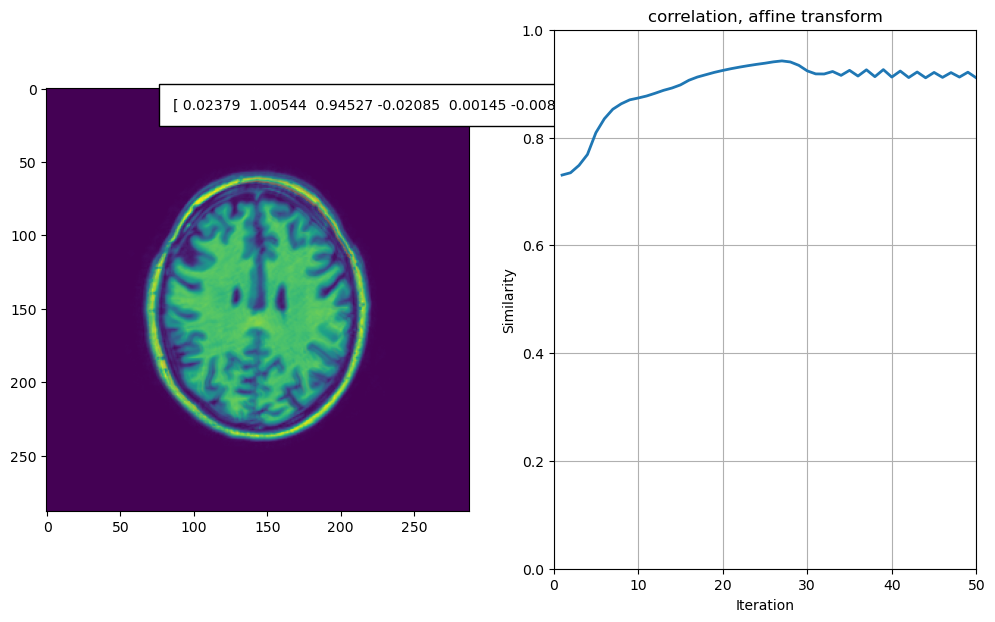

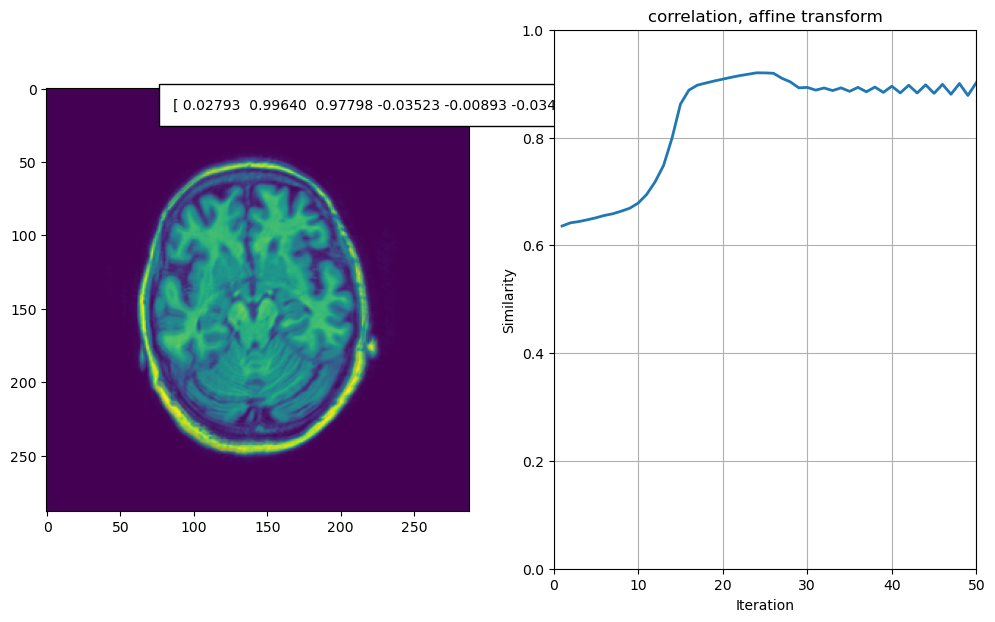

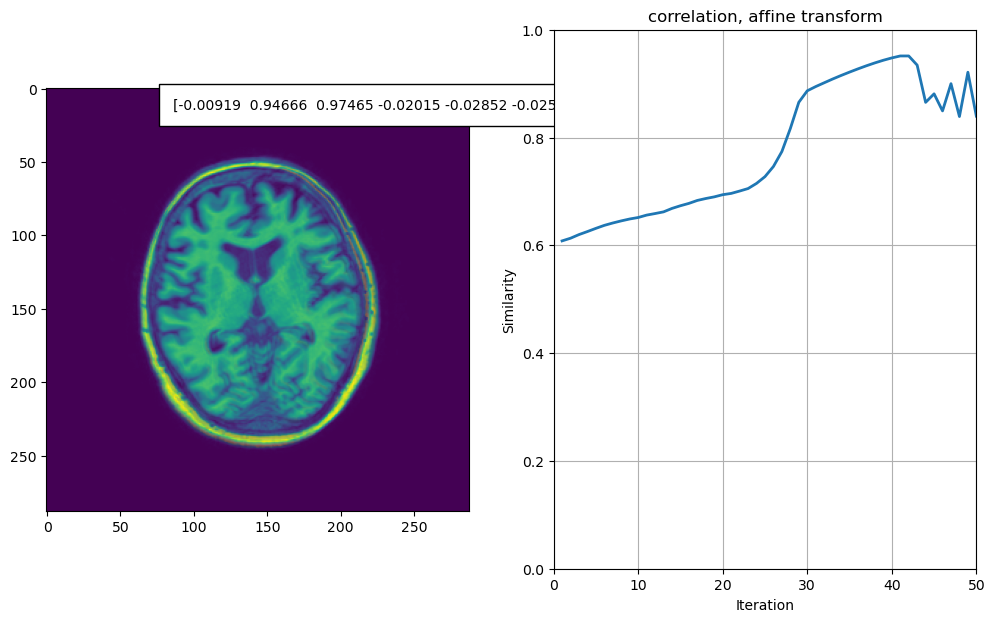

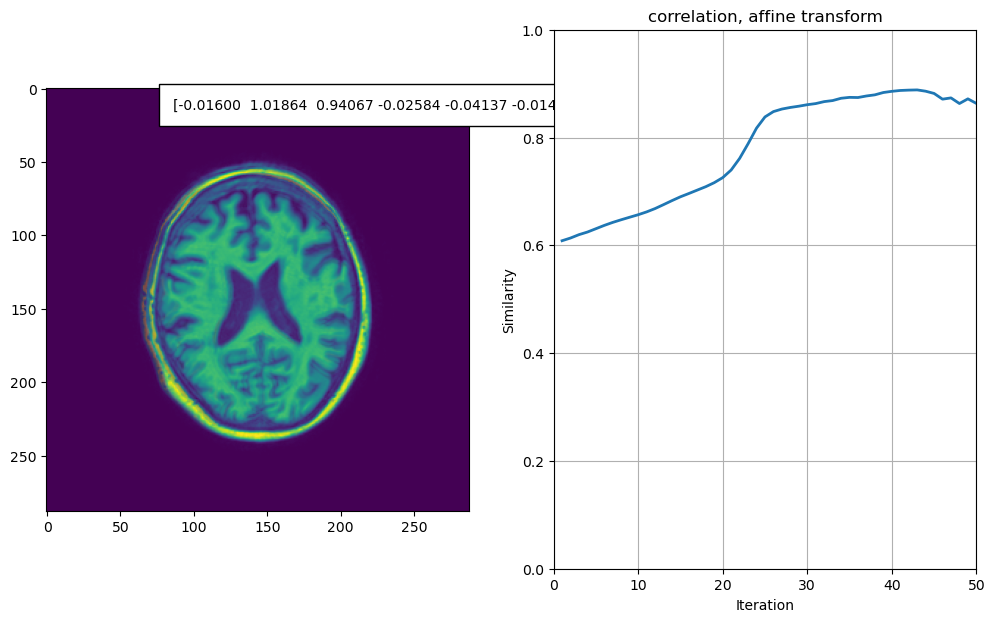

In [ ]:
outputs_adaptive_learning_rate_t1_t1_d = []
for image_t1, image_t1_d in zip(t1, t1_d):

    print('computing correlation for image:' + image_t1 + ' and ' + image_t1_d)
    I = plt.imread(image_t1)
    Im = plt.imread(image_t1_d)
    t1_t_d_output_ncc = intensity_based_registration(I, Im, adaptive_learning = True, ncc = True, rigid = False)
    outputs_adaptive_learning_rate_t1_t1_d.append(t1_t1_d_output_ncc)

In [ ]:
TRE_t2_corr = []
for points_outer, image_output, fixed_image in zip(validation_points_outer_t2, outputs_fixed_learning_rate_t1_t2, fixed_images_t2):
    im2, S, Th = image_output

    for i in range(len(points_outer)):
        x = points_outer[0][i]
        y = points_outer[1][i]
        
        TRE = im2[int(x)][int(y)] - fixed_image[int(x)][int(y)]
        
    TRE_t2_corr.append(TRE)
    
print(TRE_t2_corr)

### Correlation with adaptive learning rate of t1 and t2 images (affine)

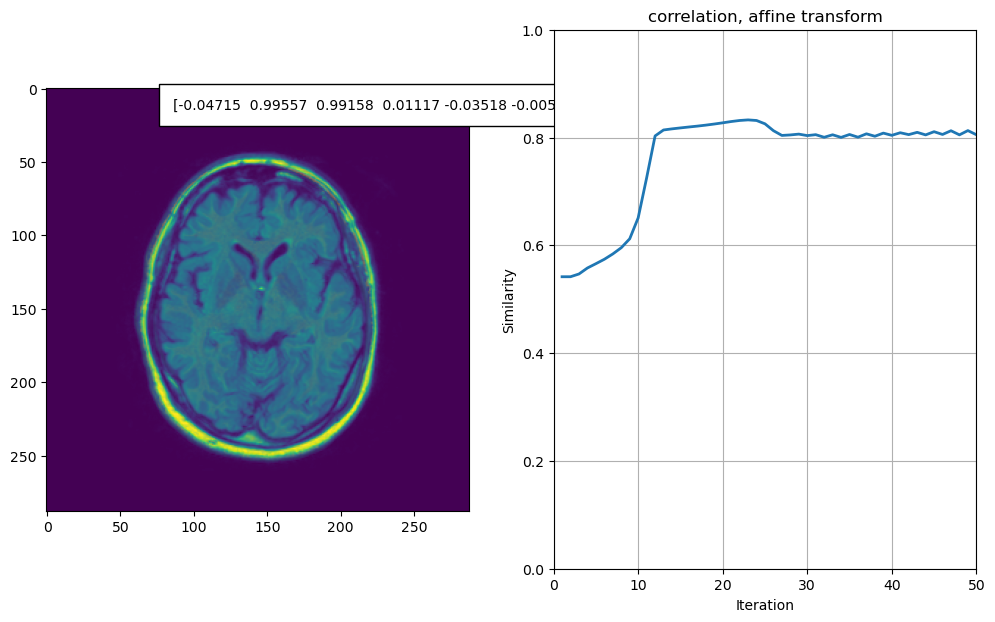

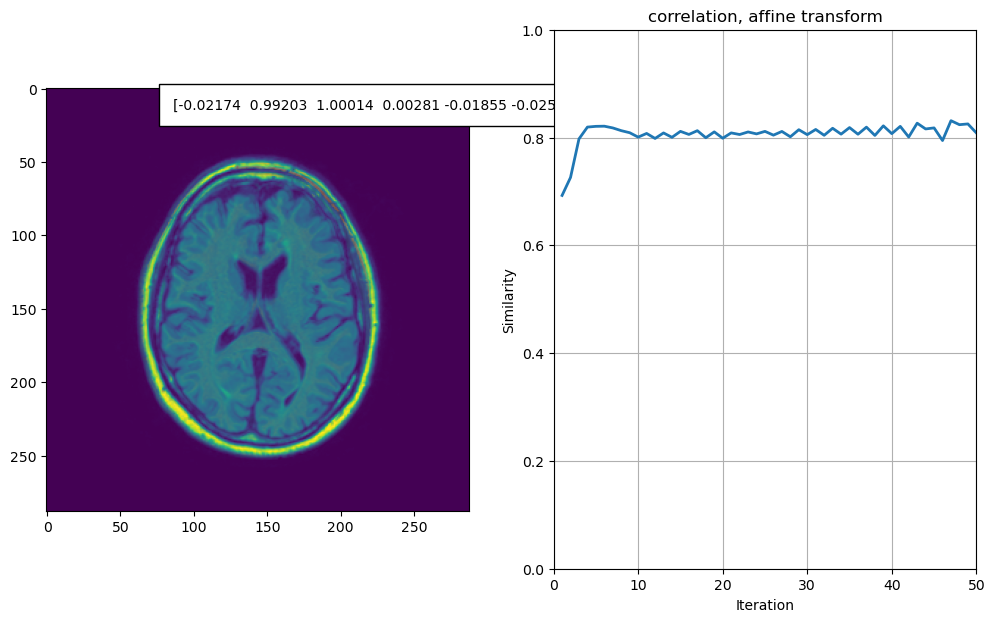

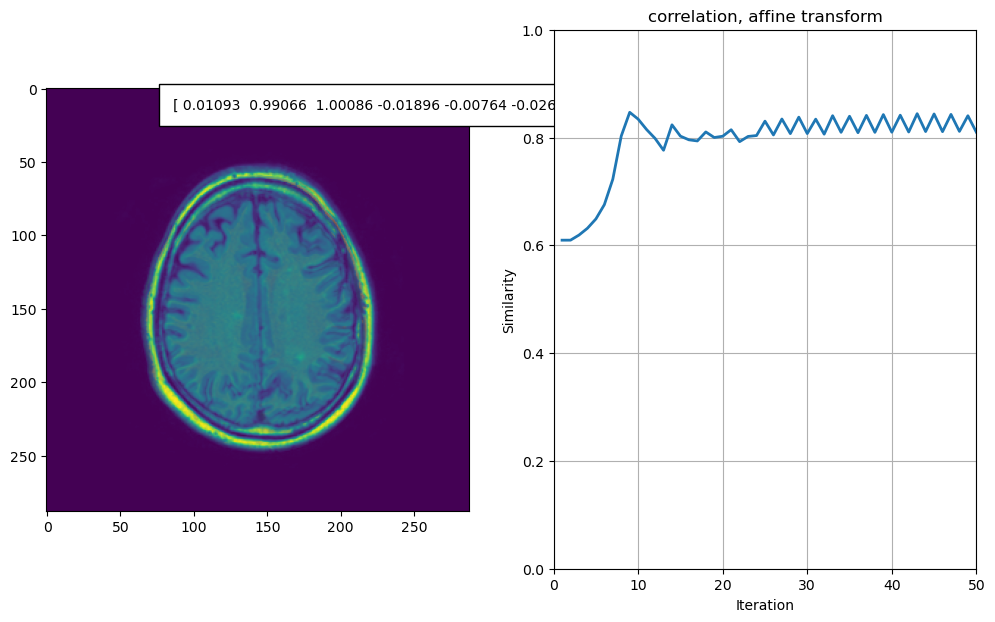

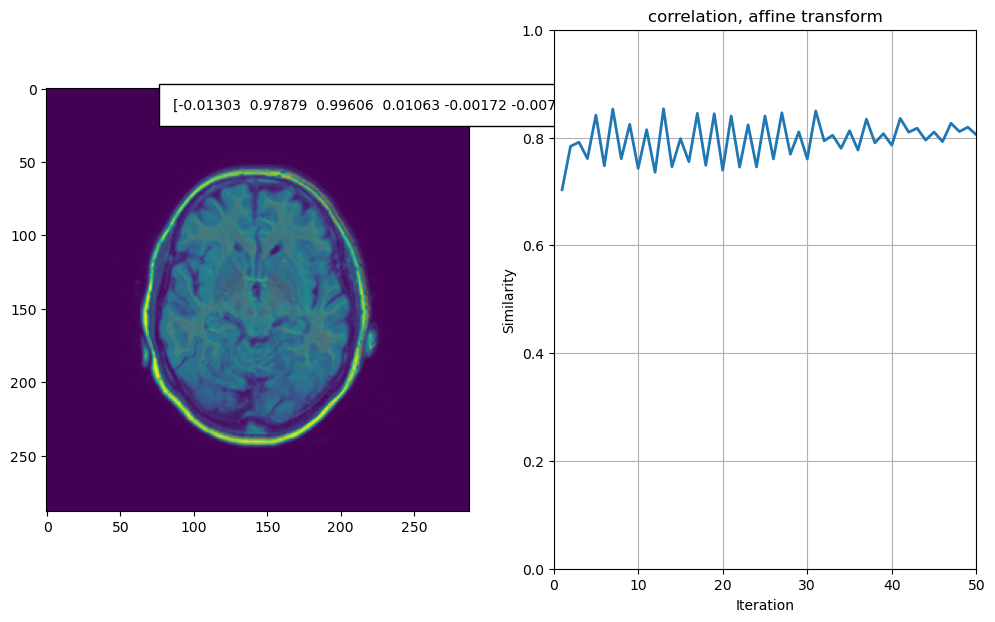

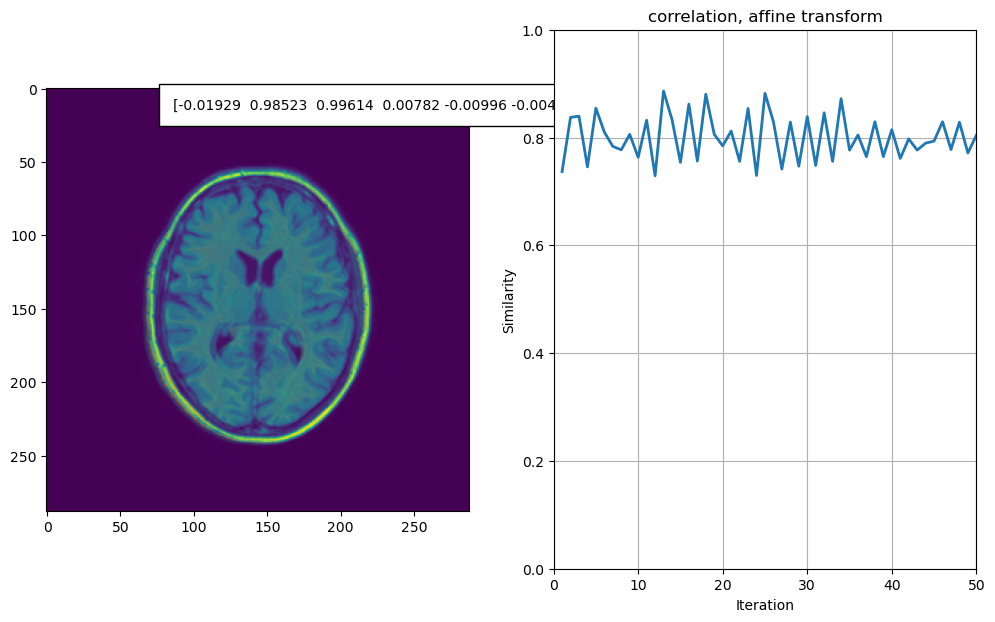

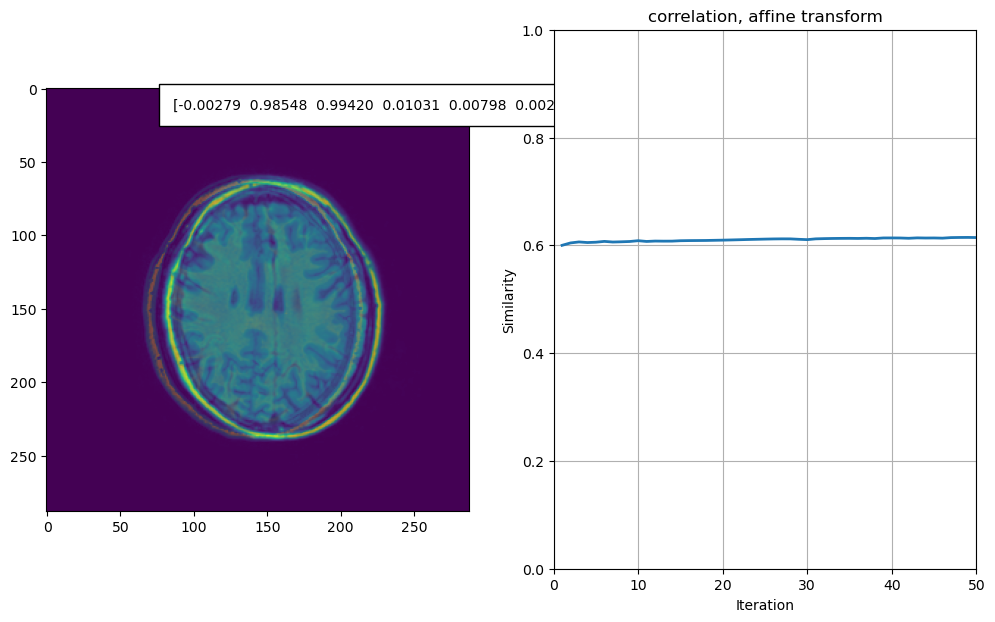

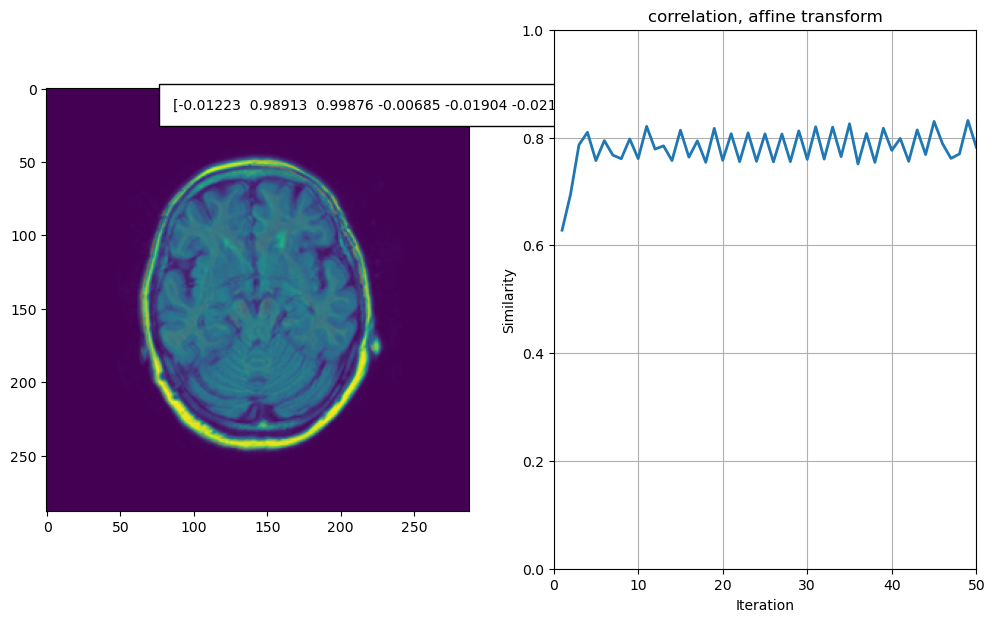

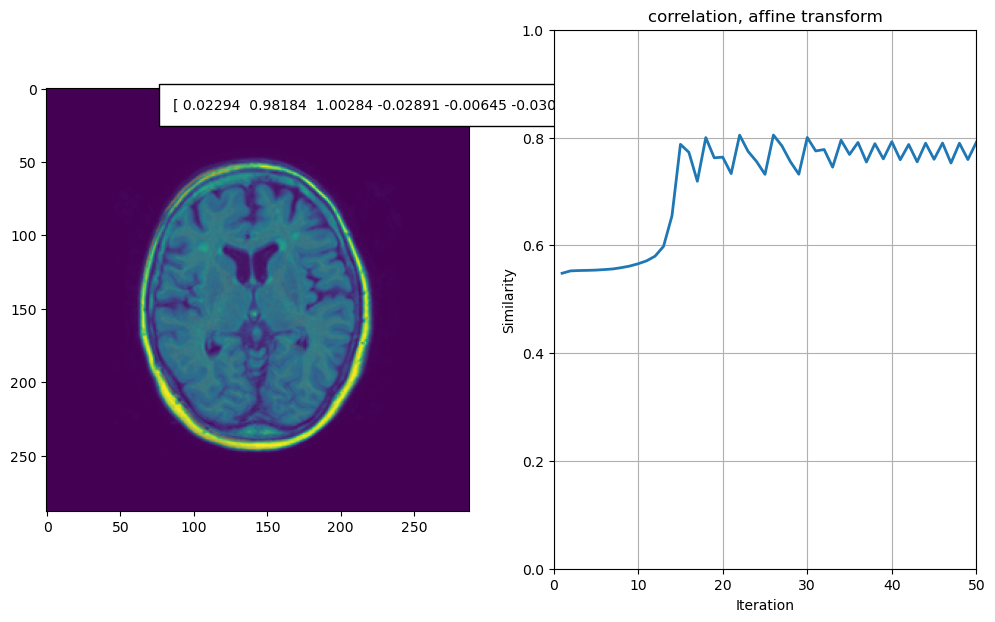

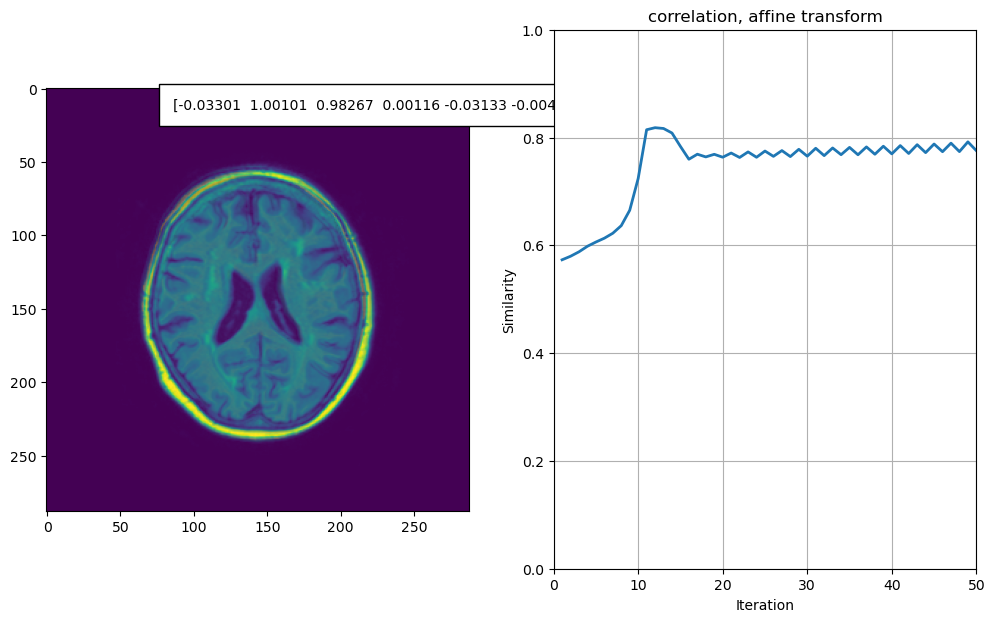

In [ ]:
outputs_adaptive_learning_rate_t1_t2 = []
for image_t1, image_t2 in zip(t1, t2):

    print('computing correlation for image:' + image_t1 + ' and ' + image_t2)
    I = plt.imread(image_t1)
    Im = plt.imread(image_t2)
    t1_t_d_output_ncc = intensity_based_registration(I, Im, adaptive_learning = True, ncc = True, rigid = False)
    outputs_adaptive_learning_rate_t1_t2.append(t1_t2_output_ncc)

### Compute the significance


In [ ]:
random_array =  np.random.rand(10)
random_array =  np.random.random(10)
random_array =  np.random.random(10)


# outputs_fixed_learning_rate_t1_t2
# outputs_adaptive_learning_rate_t1_t2
# outputs_fixed_learning_rate_t1_t1_d
# outputs_adaptive_learning_rate_t1_t1_d


similarity_fixed_learning_rate_t1_t2 =  [arr[1] for arr in outputs_fixed_learning_rate_t1_t2]
similarity_adaptive_learning_rate_t1_t2 =  [arr[1] for arr in outputs_adaptive_learning_rate_t1_t2]
similarity_fixed_learning_rate_t1_t1_d =  [arr[1] for arr in outputs_fixed_learning_rate_t1_t1_d]
similarity_adaptive_learning_rate_t1_t1_d =  [arr[1] for arr in outputs_adaptive_learning_rate_t1_t1_d]

last_similarity_fixed_learning_rate_t1_t2=  [arr[-1] for arr in similarity_fixed_learning_rate_t1_t2[-1]]
last_similarity_adaptive_learning_rate_t1_t2=  [arr[-1] for arr in similarity_adaptive_learning_rate_t1_t2[-1]]
last_similarity_fixed_learning_rate_t1_t1_d= [arr[-1] for arr in similarity_fixed_learning_rate_t1_t1_d[-1]]
last_similarity_adaptive_learning_rate_t1_t1_d=  [arr[-1] for arr in similarity_adaptive_learning_rate_t1_t1_d[-1]]


t_statistic, p_value = stats.ttest_ind(last_similarity_fixed_learning_rate_t1_t2, last_similarity_adaptive_learning_rate_t1_t2)
t_statistic, p_value = stats.ttest_ind(last_similarity_fixed_learning_rate_t1_t1_d, last_similarity_adaptive_learning_rate_t1_t1_d)



TypeError: 'tuple' object cannot be interpreted as an integer